<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # sets settings

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [83]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [84]:
# rename the dataframe
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
# want to focus on math score for grade 4 
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [89]:
df.ENROLL_ALL.isna().sum() # result = 74
df.ENROLL_ALL_EST.isna().sum() # result = 167
df[df.ENROLL_ALL_EST.isna()].ENROLL_ALL.notna().sum() # result = 93

93

In [90]:
((df.ENROLL_ALL - df.ENROLL_ALL_EST)/df.ENROLL_ALL).describe()

count    398.000000
mean       0.025870
std        0.051259
min       -0.096404
25%        0.003985
50%        0.013510
75%        0.031369
max        0.450693
dtype: float64

In [92]:
# average error between the enrollments is ~2%, so we are able to fill in missing data
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL) # fill the data in enroll_all into enroll_all_est
df[df.ENROLL_ALL_EST.isna()].ENROLL_ALL.notna().sum() # result = 0

0

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math for 4th grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [93]:
df["YEAR"].unique()

array([1992, 2000, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 1990,
       1996, 2019])

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [94]:
df_state = df.groupby("STATE") # Group the dataframe by state
df_state["AVG_MATH_4_SCORE"].mean()
# Michigan = 234.363636, Ohio = 239.454545, Ohio has the higher average math score for 4th grade

STATE
ALABAMA                 226.090909
ALASKA                  234.777778
ARIZONA                 230.909091
ARKANSAS                231.545455
CALIFORNIA              227.909091
COLORADO                239.400000
CONNECTICUT             239.909091
DELAWARE                237.200000
DISTRICT_OF_COLUMBIA    216.545455
DODEA                   241.600000
FLORIDA                 238.800000
GEORGIA                 232.545455
HAWAII                  232.181818
IDAHO                   237.000000
ILLINOIS                235.400000
INDIANA                 241.181818
IOWA                    240.090909
KANSAS                  242.600000
KENTUCKY                233.636364
LOUISIANA               226.636364
MAINE                   240.000000
MARYLAND                236.818182
MASSACHUSETTS           246.000000
MICHIGAN                234.363636
MINNESOTA               245.000000
MISSISSIPPI             226.272727
MISSOURI                236.090909
MONTANA                 240.400000
NATIONAL      

Find the average for your outcome score across all states in 2019

In [69]:
df_state_2019=df[df.YEAR == 2019].groupby("STATE") # select data in 2019 and group by state
df_state_2019["AVG_MATH_4_SCORE"].mean() # calculate the mean

STATE
ALABAMA                 230.0
ALASKA                  232.0
ARIZONA                 238.0
ARKANSAS                233.0
CALIFORNIA              235.0
COLORADO                242.0
CONNECTICUT             243.0
DELAWARE                239.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 238.0
HAWAII                  239.0
IDAHO                   242.0
ILLINOIS                237.0
INDIANA                 245.0
IOWA                    241.0
KANSAS                  239.0
KENTUCKY                239.0
LOUISIANA               231.0
MAINE                   241.0
MARYLAND                239.0
MASSACHUSETTS           247.0
MICHIGAN                236.0
MINNESOTA               248.0
MISSISSIPPI             241.0
MISSOURI                238.0
MONTANA                 241.0
NATIONAL                241.0
NEBRASKA                244.0
NEVADA                  236.0
NEW_HAMPSHIRE           245.0
NEW_JERSEY              246.0
NEW_

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [70]:
df_state["AVG_MATH_4_SCORE"].max() # find the max avg math 4 score

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [96]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,INSTRUCTION_EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,1.004650,2.025197
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,1.496312,2.132082
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,1.095128,2.184247
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,1.621537,2.732512
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,1.691007,2.680986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN,NaN


Final feature list: **<LIST FEATURES HERE\>**
SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT
INSTRUCTION_EXPENDITURE_PER_STUDENT
ENROLL_4
TOTAL_REVENUE
YEAR


Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**
I think both instruction and support service would impact student's learning experience. My hypothesis would be that the higher the state spend on instruction or support service per student, the higher student may get in their math score. 

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, '4th grade math score')

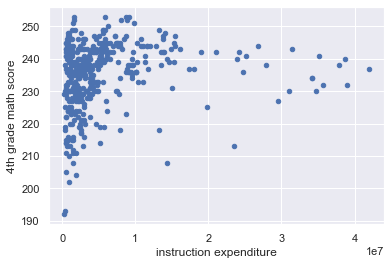

In [98]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE',y='AVG_MATH_4_SCORE')
plt.xlabel('instruction expenditure')
plt.ylabel('4th grade math score')

**<CAPTION FOR VIZ 1>**


**Visualization 2**

Text(0.5, 1.0, 'Distribution of 4th grade math scores')

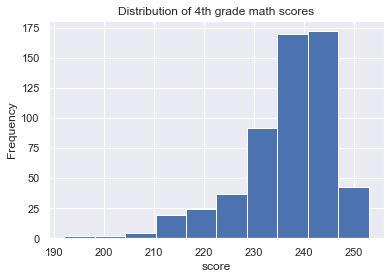

In [100]:
df.AVG_MATH_4_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 4th grade math scores')

**<CAPTION FOR VIZ 2>**


<h2> Data Creation </h2>

_Use this space to create train/test data_

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X = df[['TOTAL_REVENUE','ENROLL_4','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','INSTRUCTION_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [118]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [119]:
# create your model here
model = LinearRegression()

In [120]:
model.fit(X_train, y_train)

LinearRegression()

In [121]:
y_pred = model.predict(X_test)

In [122]:
# R**2 value describes how well a linear model fits the data
model.score(X_test, y_test)

0.600469023165348

In [123]:
# FOR CLASSIFICATION ONLY:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(model, X_test, y_test,
#                          cmap=plt.cm.Blues)

/Users/zhaokaixin/Desktop/mdst_tutorials_W22/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Math 4 score')

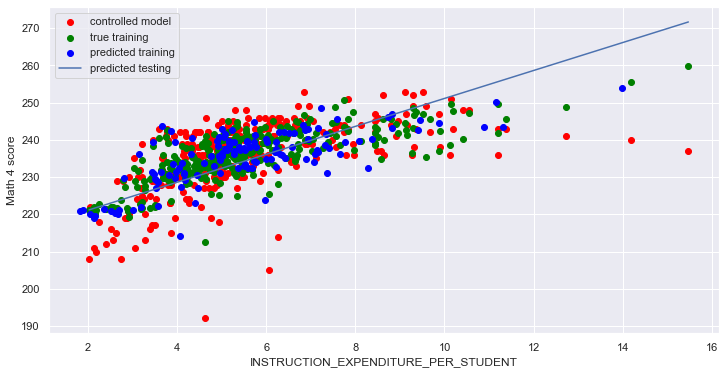

In [124]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**
The plot seems to show that the predicted training pattern fits testing data. There is positive linear relationship between math score for grade 4 student and instruction expenditure per student. The higher instruction expenditure per student is, the higher the math score for grade 4 student is. Therefore, student performance may be predicted by instruction expenditure per student. 